In [26]:
import sys
sys.path.append('../')
from finetune.search import create_index, batch_search
from finetune.embedding import *
from finetune.eval import evaluate
import os
import json
import matplotlib.pyplot as plt


VAL_DATASET_FPATH = '../data/val_dataset.json'
with open(VAL_DATASET_FPATH, 'r+') as f:
    val_dataset = json.load(f)

# Evaluation of the OpenAI/text-embedding-ada-002

In [3]:
encoder=OpenAIEncoder()
print('OpenAI/text-embedding-ada-002 hit rate:',evaluate(val_dataset,encoder, if_load=True))

OpenAI/text-embedding-ada-002 hit rate: 0.8734177215189873


# Evaluation of the pre-trained BAAI/bge-small-en

In [2]:
encoder=SentenceTransformerEncoder(model_name="BAAI/bge-small-en")
print('BAAI/bge-small-en pretrained hit rate:',evaluate(val_dataset,encoder))

Embed queries...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  9.89it/s]


Embed corpus...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.78it/s]


BAAI/bge-small-en pretrained hit rate: 0.739240506329114


# Evaluation of the pre-trained FAE
We augment the OpenAI/text-embedding-ada-002 embeddings with the embeddings from the pre-trained BAAI/bge-small-en.

In [4]:
encoder=FAEEncoder(model_name="BAAI/bge-small-en",if_load=True)
print('FAE pre-trained hit rate:',evaluate(val_dataset,encoder))

Embed queries...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 47.87it/s]


Embed corpus...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.68it/s]

FAE pre-trained hit rate: 0.8645569620253165


# Test hit rate of the BAAI/bge-small-en fine-tuning

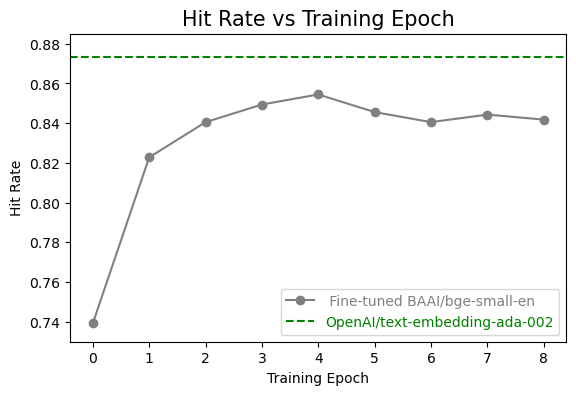

In [36]:
bbai_eval_list=np.load('../results/bge-small-en_eval.npy')

fig, ax = plt.subplots(figsize=(6.4, 4))
ax.plot(bbai_eval_list, marker='o', linestyle='-', color='grey', label=' Fine-tuned BAAI/bge-small-en')
openai_eval = 0.873418
ax.axhline(y=openai_eval, color='g', linestyle='--', label='OpenAI/text-embedding-ada-002')
title_font = {'color': 'black', 'size': 15} 
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Hit Rate')
ax.set_title('Hit Rate vs Training Epoch', fontdict=title_font)
legend = ax.legend(loc='lower right') 
legend.get_texts()[0].set_color('grey') 
legend.get_texts()[1].set_color('g')  

ax.set_ylim(0.73, 0.885)
plt.show()


# Test hit rate of the FAE fine-tuning

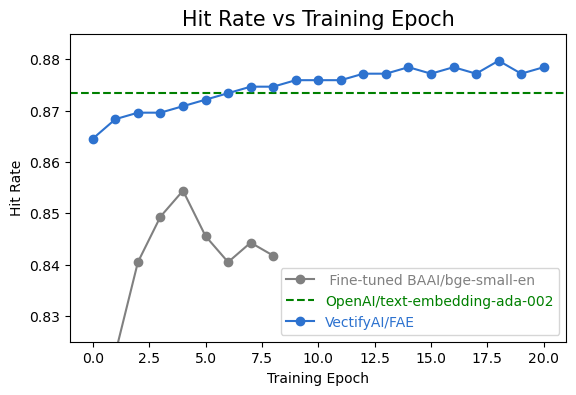

In [37]:
bbai_eval_list=np.load('../results/bge-small-en_eval.npy')
fae_eval_list=np.load('../results/fae_eval.npy')

fig, ax = plt.subplots(figsize=(6.4, 4))
ax.plot(bbai_eval_list, marker='o', linestyle='-', color='grey', label=' Fine-tuned BAAI/bge-small-en')
openai_eval = 0.873418
ax.axhline(y=openai_eval, color='g', linestyle='--', label='OpenAI/text-embedding-ada-002')
ax.plot(fae_eval_list, marker='o', linestyle='-', color='#2D72CF', label='VectifyAI/FAE')
title_font = {'color': 'black', 'size': 15} 
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Hit Rate')
ax.set_title('Hit Rate vs Training Epoch', fontdict=title_font)
legend = ax.legend(loc='lower right') 
legend.get_texts()[0].set_color('grey') 
legend.get_texts()[1].set_color('g')  
legend.get_texts()[2].set_color('#2D72CF')  

ax.set_ylim(0.825, 0.885)
plt.show()
